In [11]:
import sys
import logging
import math

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from IPython.core.display import HTML

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

import plotly.express as px

%matplotlib inline

matplotlib.style.use("Solarize_Light2")

sys.path.insert(0, "/opt/vssexclude/personal/kaggle/k_tab_sept")

In [4]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [5]:
import src.config.constants as constants
import src.munging as process_data
import src.viz as viz
import src.common as common

In [6]:
logger = common.get_logger("eda")

In [8]:
sub_1 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_cat_K10_nonull_full_data_mean_sum_max_Kaggle_bin_params_0921_2000_0.81612.gz")
sub_2 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_xgb_K10_nonull_mean_sum_max_custom_imp_StScaler_K_params_0921_2239_0.81649.gz")
sub_4 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_lgb_K5_nonull_mean_sum_max_mean_imp_no_scaler_params_K_0922_1212_0.81623.gz")

sub_3 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_cat_K10_nonull_mean_sum_max_noImp_noScaler_K_params_0922_0747_0.81549.gz")

sub_6 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_xgb_K10_nonull_mean_sum_max_no_imp_no_scaler_K_params_0922_1630_0.81634.gz")

In [21]:
sub_4.head()

,id,claim
0,957919,0.558345
1,957920,0.120681
2,957921,0.626777
3,957922,0.129860
4,957923,0.152024


In [22]:
sub_5.head()

,id,claim
0,957919,0.558345
1,957920,0.120681
2,957921,0.626777
3,957922,0.129860
4,957923,0.152024


In [19]:
group_labels = ['cat_imp', 'xgb_imp', 'cat_no_imp', 'lgb_imp', 'lgb_no_imp', "xgb_no_imp"]

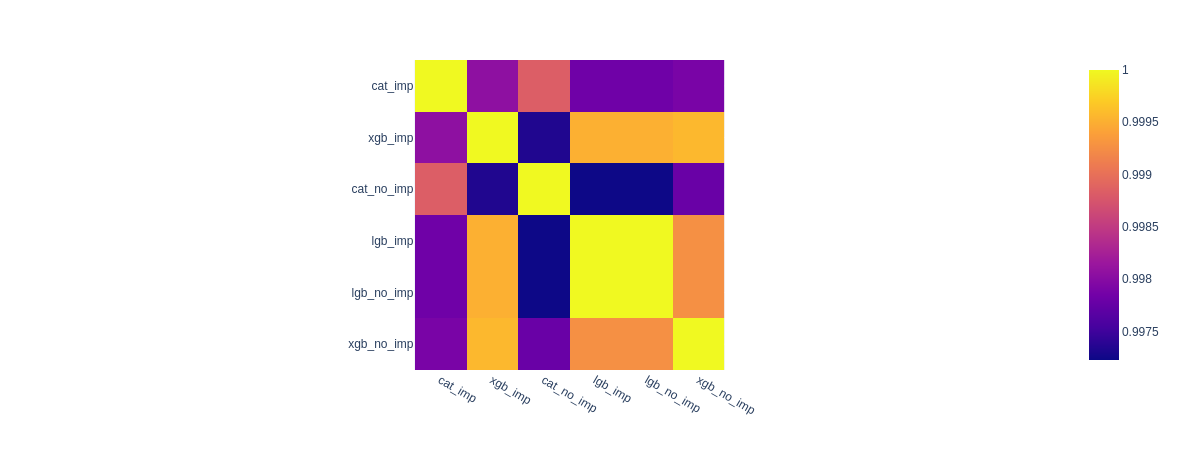

In [20]:
data = np.corrcoef([sub_1.claim, sub_2.claim, sub_3.claim, sub_4.claim, sub_5.claim, sub_6.claim])
fig=px.imshow(data, x=group_labels, y=group_labels)

fig.show()

In [42]:
# group_labels = ['cat_imp', 'xgb_imp', 'cat_no_imp', 'lgb_imp', 'lgb_no_imp', "xgb_no_imp"]
group_labels = ['"xgb_no_imp"', 'xgb_imp', 'lgb_no_imp', ]

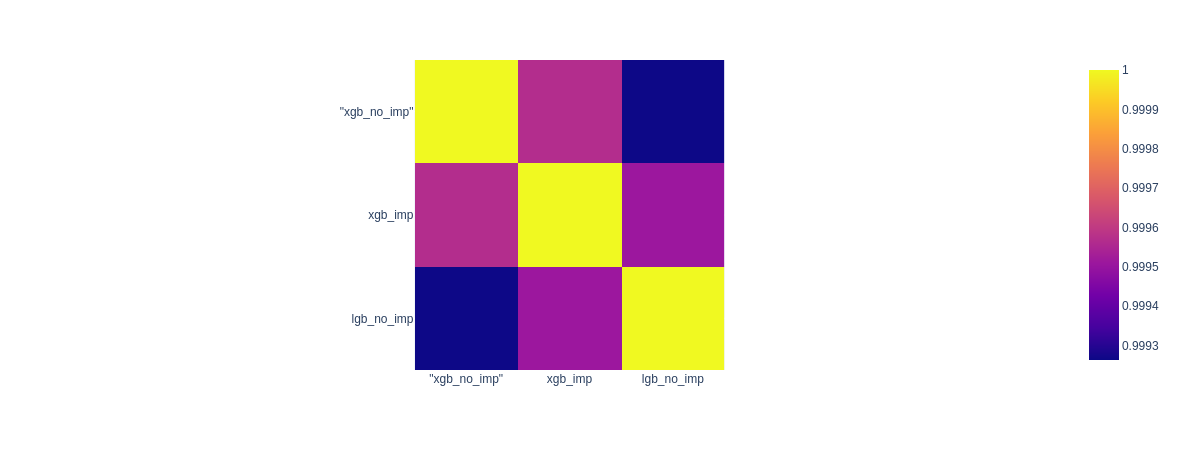

In [43]:
data = np.corrcoef([sub_6.claim, sub_2.claim, sub_5.claim,])
fig=px.imshow(data, x=group_labels, y=group_labels)

fig.show()

In [36]:
sub_6 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_xgb_K10_nonull_mean_sum_max_no_imp_no_scaler_K_params_0922_1630_0.81634.gz")
sub_2 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_xgb_K10_nonull_mean_sum_max_custom_imp_StScaler_K_params_0921_2239_0.81649.gz")
sub_5 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_lgb_K5_nonull_mean_sum_max_no_imp_no_scaler_params_K_0922_1420_0.81623.gz")

In [37]:
# Power is arbitrary - refer to blog post for more info to get a better power
ensemble_df  = sub_6.copy()
ensemble_df.loc[:, 'claim'] = (sub_6**4 + sub_2**4 + sub_5**4)/3

In [38]:
logger = common.get_logger("main")

In [39]:
ensemble_df.head()

,id,claim
0,957919,0.105719
1,957920,0.000215
2,957921,0.159638
3,957922,0.000282
4,957923,0.000559


In [41]:
common.save_file(
        logger,
        ensemble_df,
        constants.SUBMISSION_DIR,
        f"sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz",
        index=False,
        compression="gzip",
    )

[INFO]2021-09-23 21:44:00,354:main:Saving /opt/vssexclude/personal/kaggle/k_tab_sept/submissions/sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz
[INFO]2021-09-23 21:44:00,354:main:Saving /opt/vssexclude/personal/kaggle/k_tab_sept/submissions/sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz
[INFO]2021-09-23 21:44:00,354:main:Saving /opt/vssexclude/personal/kaggle/k_tab_sept/submissions/sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz


In [44]:
pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz").head()

,id,claim
0,957919,0.105719
1,957920,0.000215
2,957921,0.159638
3,957922,0.000282
4,957923,0.000559


In [45]:
pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_power_8_xgb_no_imp_xgb_imp_lgb_no_imp.gz").head()

,id,claim
0,957919,1.121322e-02
1,957920,4.628708e-08
2,957921,2.550113e-02
3,957922,8.007960e-08
4,957923,3.134850e-07
